In [2]:
import numpy as np 
import seaborn as sns
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nohouse_pd = pd.read_csv("financials/noHouse.csv")
onehouse_pd = pd.read_csv("financials/oneHouse.csv")
twohouse_pd = pd.read_csv("financials/twoHouse.csv")
threehouse_pd = pd.read_csv("financials/threeHouse.csv")
fourhouse_pd = pd.read_csv("financials/fourHouse.csv")

In [4]:
nohouse_only = nohouse_pd[nohouse_pd['color'].notnull()]
nohouse_only['house'] = 'nohouse'
onehouse_only = onehouse_pd[nohouse_pd['color'].notnull()]
onehouse_only['house'] = 'onehouse'
twohouse_only = twohouse_pd[nohouse_pd['color'].notnull()]
twohouse_only['house'] = 'twohouse'
threehouse_only = threehouse_pd[nohouse_pd['color'].notnull()]
threehouse_only['house'] = 'threehouse'
fourhouse_only = fourhouse_pd[nohouse_pd['color'].notnull()]
fourhouse_only['house'] = 'fourhouse'

/var/folders/y_/5yqgxwqn2xnff_njmlbw80mh0000gn/T/ipykernel_30545/4040352083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nohouse_only['house'] = 'nohouse'
/var/folders/y_/5yqgxwqn2xnff_njmlbw80mh0000gn/T/ipykernel_30545/4040352083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onehouse_only['house'] = 'onehouse'
/var/folders/y_/5yqgxwqn2xnff_njmlbw80mh0000gn/T/ipykernel_30545/4040352083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [5]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
combined_df = pd.concat([nohouse_only, onehouse_only, twohouse_only, threehouse_only, fourhouse_only])

In [7]:
palette ={"brown": "C5", "cyan": "C9", "pink": "C6", "orange": "C1", "red": "C3", "yellow":"C8", "green":"C2", "blue":"C0"}

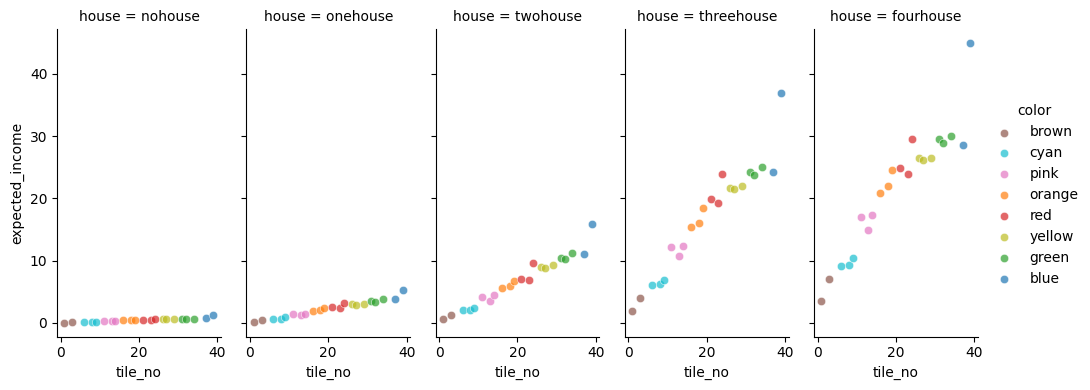

In [8]:
I = sns.FacetGrid(combined_df, col="house", hue="color", palette=palette, height=4, aspect=.5)
I.map(sns.scatterplot, "tile_no", "expected_income", alpha=.7)
I.add_legend()

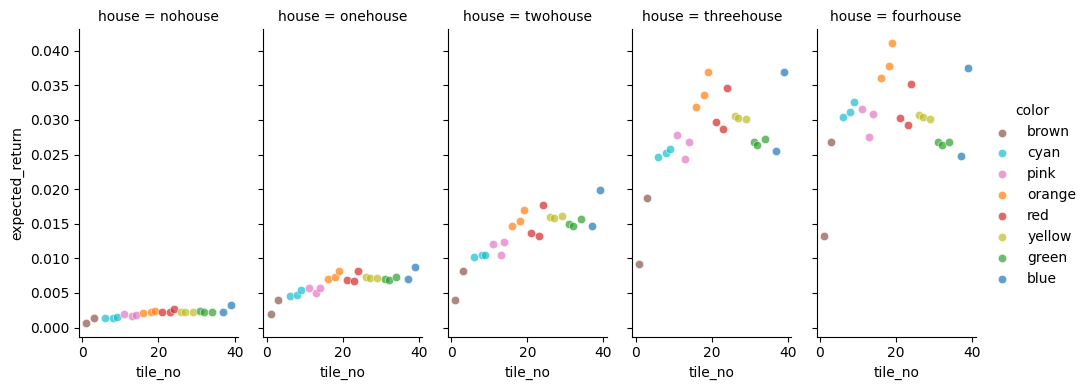

In [9]:
g = sns.FacetGrid(combined_df, col="house", hue="color", palette=palette, height=4, aspect=.5)
g.map(sns.scatterplot, "tile_no", "expected_return", alpha=.7)
g.add_legend()

In [10]:
def house_to_num(house):
    if house == 'nohouse':
        return 0
    elif house == 'onehouse':
        return 1
    elif house == 'twohouse':
        return 2
    elif house == 'threehouse':
        return 3
    else:
        return 4

combinedint_df = combined_df
combinedint_df['house'] = combinedint_df['house'].map(house_to_num)
combinedint_df.head()

,tile_no,color,name,probi,expected_income,expected_return,rank,house
1,1,brown,Mediterranean Avenue,0.021480,0.042961,0.000716,22.0,0
3,3,brown,Baltic Avenue,0.021806,0.087223,0.001454,19.0,0
6,6,cyan,Oriental Avenue,0.022785,0.136712,0.001367,21.0,0
8,8,cyan,Vermont Avenue,0.023391,0.140345,0.001403,20.0,0
9,9,cyan,Connecticut Avenue,0.023224,0.185788,0.001548,18.0,0


Text(0.5, 1.0, 'Expected Returns: 0-2 houses')

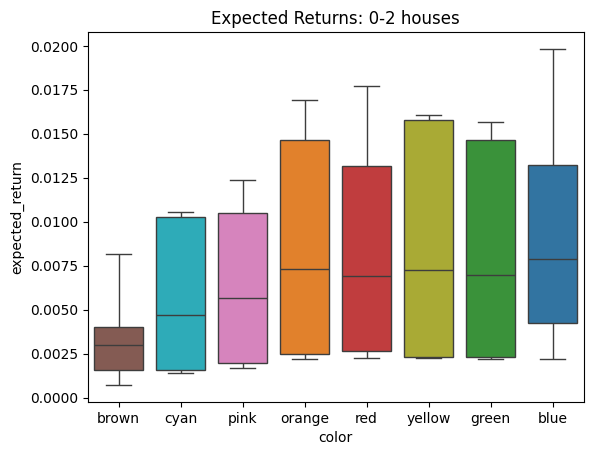

In [11]:
sns.boxplot(data=combined_df[combinedint_df['house'] < 3 ], x="color", y="expected_return", whis=(0, 100), hue="color", palette=palette).set_title("Expected Returns: 0-2 houses")

Text(0.5, 1.0, 'Expected Returns: 3-4 houses')

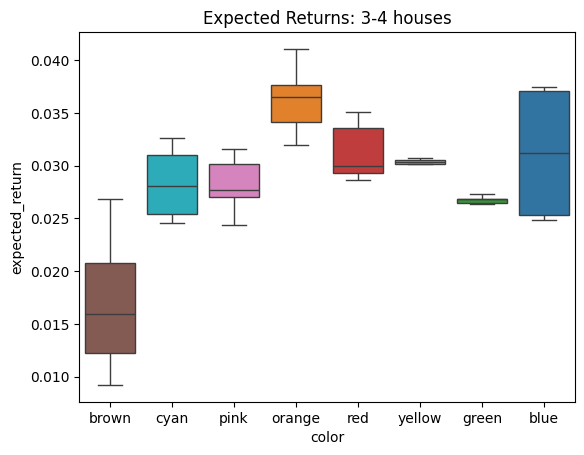

In [12]:
sns.boxplot(data=combinedint_df[combinedint_df['house'] >= 3], x="color", y="expected_return", whis=(0, 100), hue="color", palette=palette).set_title("Expected Returns: 3-4 houses")

Text(0.5, 1.0, 'Expected Returns: 0-4 houses')

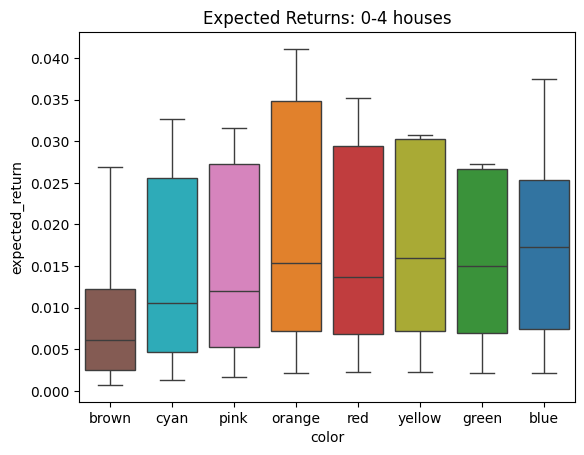

In [13]:
sns.boxplot(data=combinedint_df, x="color", y="expected_return", whis=(0, 100), hue="color", palette=palette).set_title("Expected Returns: 0-4 houses")